In [797]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [798]:
import warnings
warnings.filterwarnings('ignore')

In [799]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [800]:
data_pca = PCA(n_components = 2).fit_transform(df[df.columns[:-1]]).T

In [801]:
df_pca = pd.DataFrame({'V1': data_pca[0], 'V2' : data_pca[1], 'fetal_health' : df['fetal_health'].values})

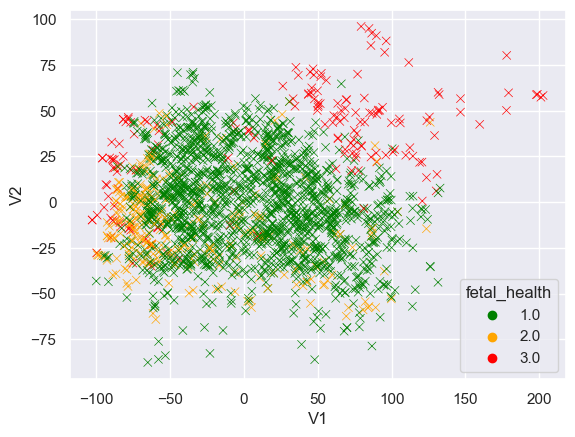

In [802]:
sns.set(style = 'darkgrid')
sns.scatterplot(data = df_pca, x ='V1', y ='V2', hue = 'fetal_health', palette = ['green', 'orange', 'red'], marker = 'x')
plt.show()

In [803]:
data_tsne = TSNE(n_components = 2).fit_transform(df[df.columns[:-1]]).T

In [804]:
df_tsne = pd.DataFrame({'V1': data_tsne[0], 'V2' : data_tsne[1], 'fetal_health' : df['fetal_health'].values})

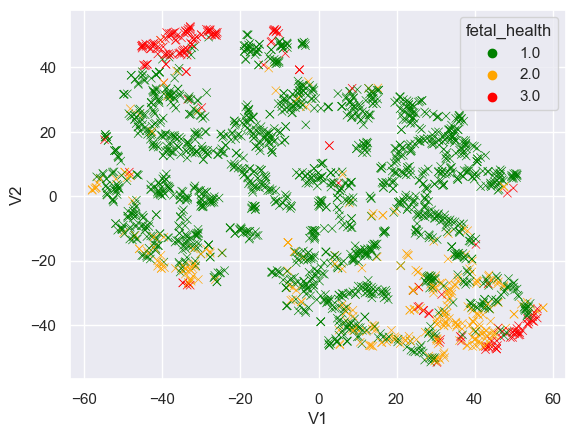

In [805]:
sns.scatterplot(data = df_tsne, x ='V1', y ='V2', hue = 'fetal_health', palette = ['green', 'orange', 'red'], marker = 'x')
plt.show()

In [806]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [807]:
pic = plt.imread('photo.jpg')

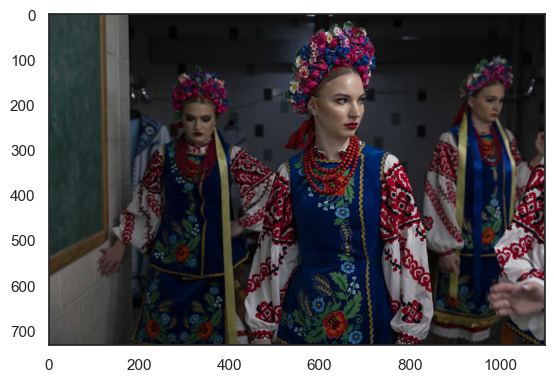

In [808]:
sns.set(style = 'white')
plt.imshow(pic)
plt.show()

In [809]:
pic = np.array(pic, dtype = np.float64)/255

In [810]:
w, h, d = pic.shape
pic_array = np.reshape(pic, (w*h, d))

In [811]:
n = [64, 32, 16, 8]

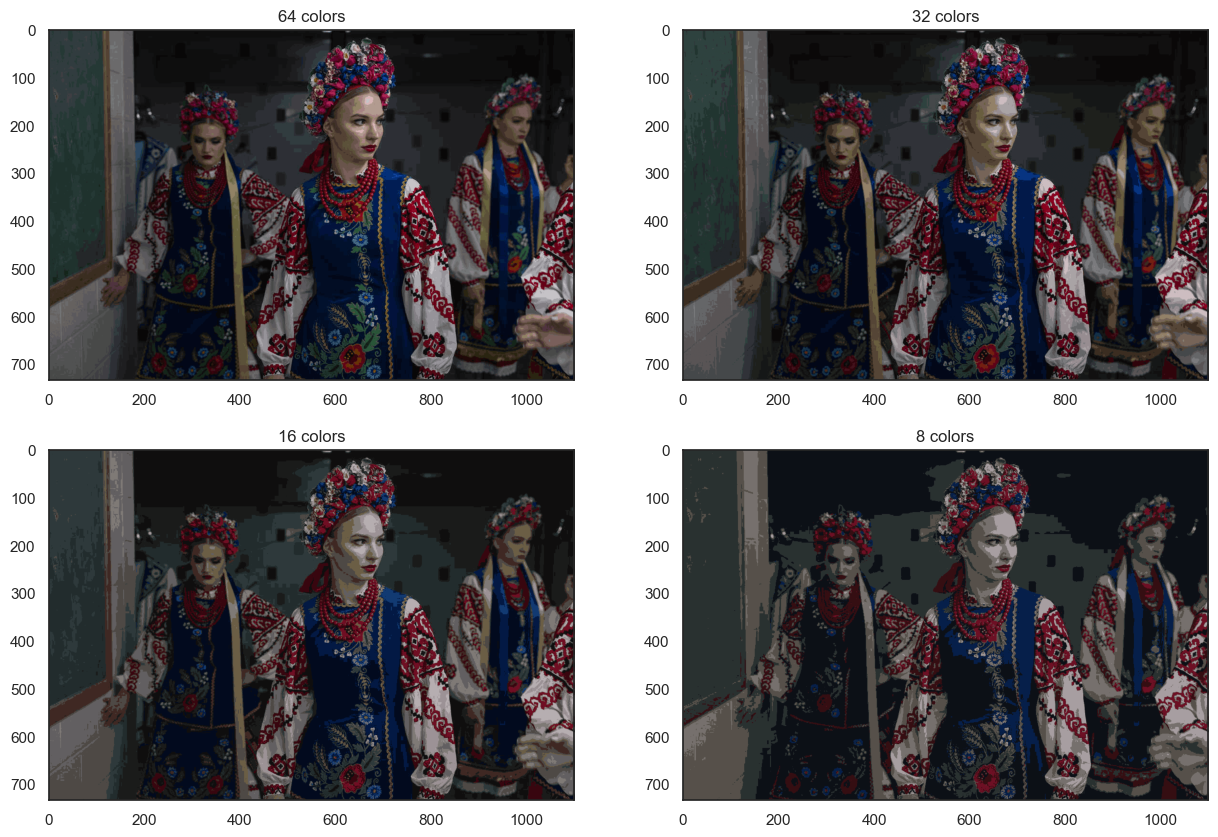

In [812]:
rand_sample = shuffle(pic_array, n_samples = 1000)
plt.subplots(figsize = (15, 10))
for n_i in n:
    model = KMeans(n_clusters = n_i).fit(rand_sample)
    pred_pic = model.predict(pic_array)
    plt.subplot(2, 2, n.index(n_i) + 1)
    plt.title(f'{n_i} colors')
    plt.imshow(model.cluster_centers_[pred_pic].reshape(w, h, -1))

In [813]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix

In [814]:
df = pd.read_csv('JEOPARDY_CSV.csv')
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [815]:
df.columns = [col.replace(' ', '') for col in df.columns]

In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ShowNumber  216930 non-null  int64 
 1   AirDate     216930 non-null  object
 2   Round       216930 non-null  object
 3   Category    216930 non-null  object
 4   Value       216930 non-null  object
 5   Question    216930 non-null  object
 6   Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [817]:
df = df[['Category', 'Question']]
df.nunique()

Category     27995
Question    216124
dtype: int64

In [818]:
df['Category'].value_counts()[:4]

BEFORE & AFTER      547
SCIENCE             519
LITERATURE          496
AMERICAN HISTORY    418
Name: Category, dtype: int64

In [819]:
df = df[df['Category'].isin(df['Category'].value_counts()[:4].index.tolist())][['Category', 'Question']]
df.head()

,Category,Question
268,SCIENCE,"At sea level at 70 degrees this travels 1,129 ..."
274,SCIENCE,"The largest tree, the General Sherman in Calif..."
280,SCIENCE,"(<a href=""http://www.j-archive.com/media/2006-..."
286,SCIENCE,6 elements once known as inert gases are now k...
292,SCIENCE,"(<a href=""http://www.j-archive.com/media/2006-..."


In [820]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [821]:
df['Question'] = [re.sub(f'[^{string.ascii_lowercase + string.digits + string.whitespace}]', '', 
                  ' '.join([lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]).lower()) 
                  for text in df['Question'].values]
categories = sorted(df['Category'].unique())
df['Category'].replace(categories, range(4), inplace = True)
df.head()

,Category,Question
268,3,at sea level 70 degree travel 1129 foot per se...
274,3,the largest tree general sherman california ty...
280,3,a hrefhttpwwwjarchivecommedia20060206dj13jpg t...
286,3,6 element known inert gas known aristocratic name
292,3,a hrefhttpwwwjarchivecommedia20060206dj15wmva ...


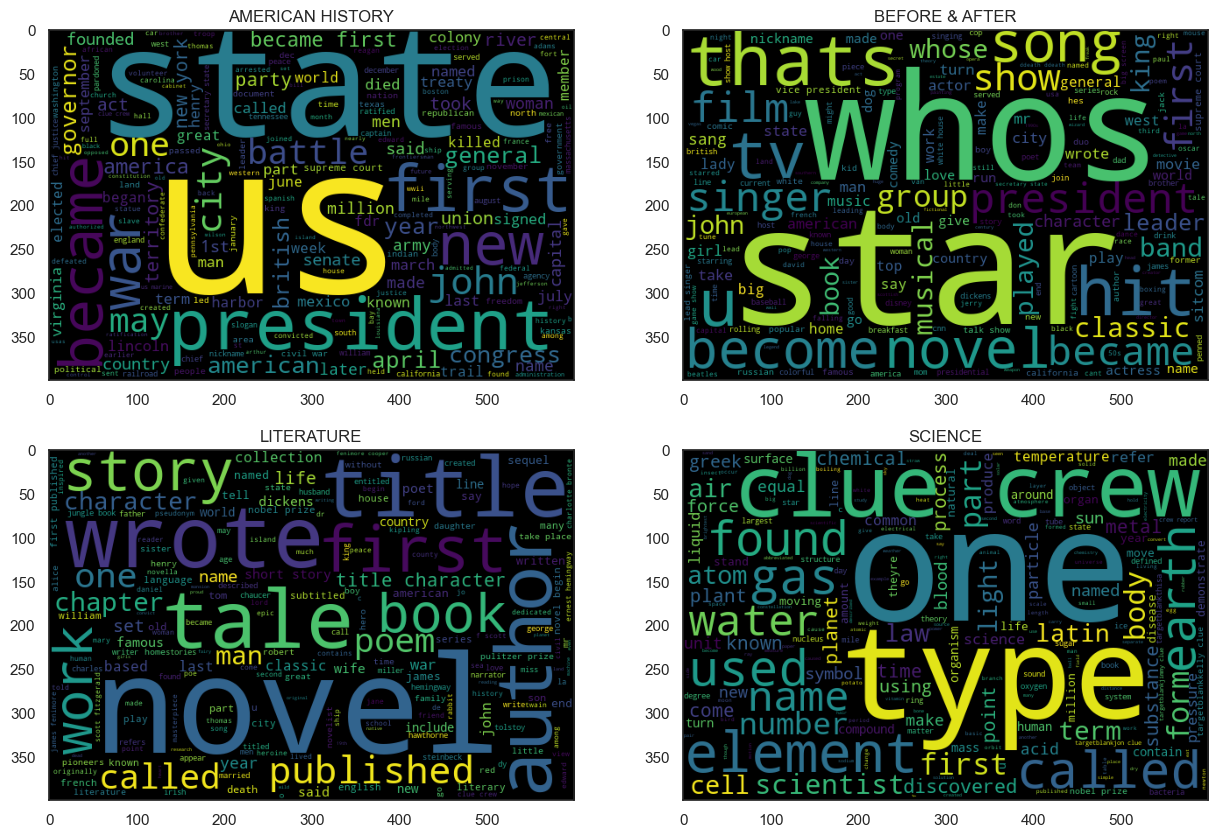

In [631]:
plt.subplots(figsize = (15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(categories[i])
    plt.imshow(WordCloud(width = 600, height = 400).generate(' '.join(df[df['Category'] == i]['Question'])))

In [822]:
x_train, x_test, y_train, y_test = train_test_split(df['Question'], df['Category'], test_size = 0.5)

In [823]:
vectorizer = TfidfVectorizer(max_df = 0.9)
#vectorizer = CountVectorizer(max_df = 0.9)
x_train_transformed = vectorizer.fit_transform(x_train)
x_test_transformed = vectorizer.transform(x_test)

In [824]:
model = LogisticRegression().fit(x_train_transformed, y_train)
y_pred = model.predict(x_test_transformed)

In [825]:
confusion_matrix(y_pred, y_test)

array([[161,  18,   4,   7],
       [ 25, 211,  12,  18],
       [ 12,  36, 201,  15],
       [ 16,  22,  16, 216]], dtype=int64)

In [826]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       190
           1       0.74      0.79      0.76       266
           2       0.86      0.76      0.81       264
           3       0.84      0.80      0.82       270

    accuracy                           0.80       990
   macro avg       0.80      0.80      0.80       990
weighted avg       0.80      0.80      0.80       990

